<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explore-Dataset" data-toc-modified-id="Explore-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explore Dataset</a></span><ul class="toc-item"><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Description-of-data" data-toc-modified-id="Description-of-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description of data</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Prepare-data-for-model" data-toc-modified-id="Prepare-data-for-model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Prepare data for model</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

## Explore Dataset

### Get the data

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [5]:
!pwd

/home/smirnova/study/SIMPLON/projects/cancer_prediction/notebooks


In [6]:
df = pd.read_csv("../data/Breast_Cancer.csv")

In [7]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [9]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Description of data


In [29]:
for i in df.columns:
    if len(df[i].unique())<10:
        print(f"Column - '{i}'")
        print(f"{df[i].value_counts()}")
        print("\n")

Column - 'Race'
White    3413
Other     320
Black     291
Name: Race, dtype: int64


Column - 'Marital Status'
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64


Column - 'T Stage '
T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64


Column - 'N Stage'
N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64


Column - '6th Stage'
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64


Column - 'differentiate'
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64


Column - 'Grade'
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64


Column - 'A Stage'
Regional    3932
Distant       92
Name: A Stage, dtype: int64


Column - 'Estrogen Sta

In [21]:
df["Status"].unique()

array(['Alive', 'Dead'], dtype=object)

### Explore 

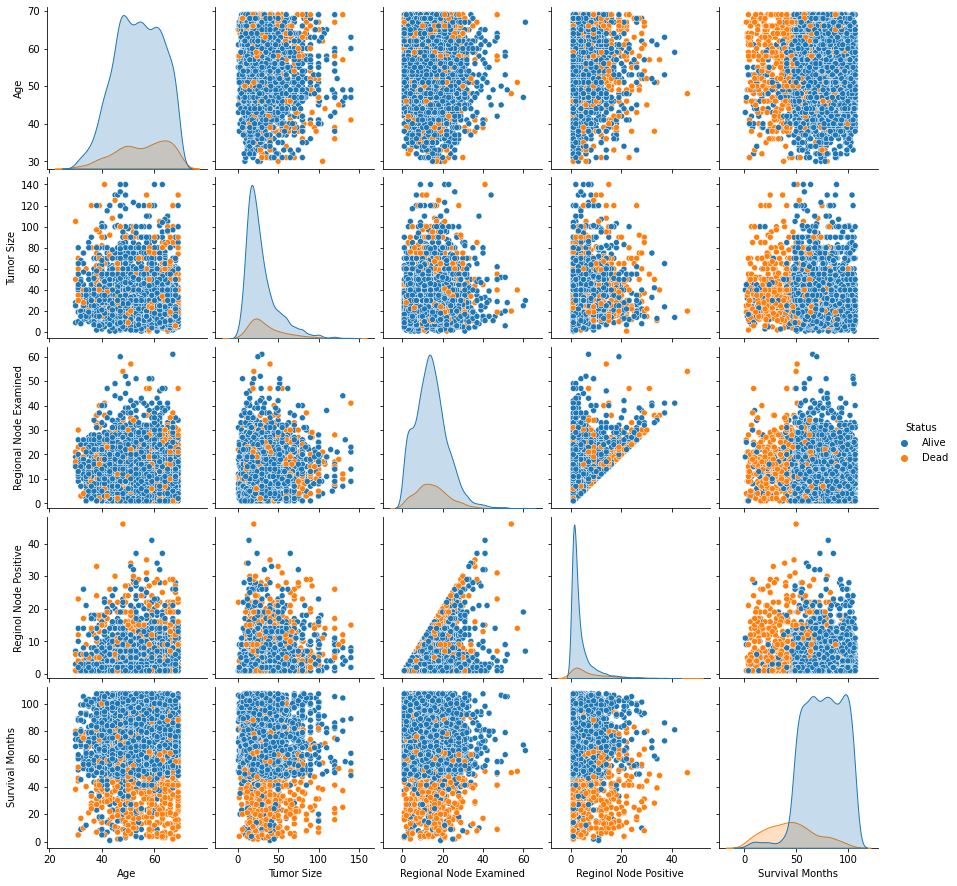

In [46]:
sns.pairplot(df, hue='Status')

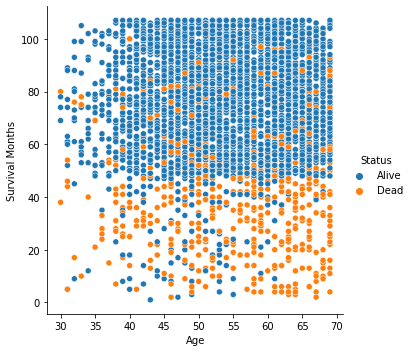

In [17]:
sns.relplot(data=df, x='Age', y='Survival Months', hue='Status')

### Univariate analysis

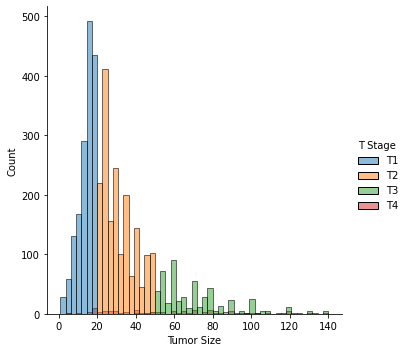

In [30]:
sns.displot(data=df, x= "Tumor Size", hue = "T Stage ")

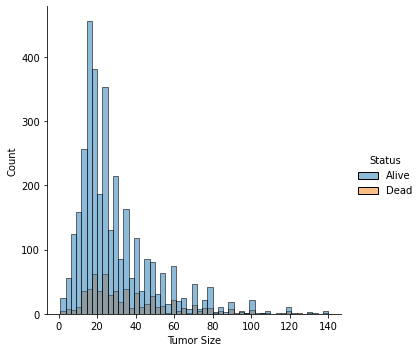

In [31]:
sns.displot(data=df, x= "Tumor Size", hue = "Status")

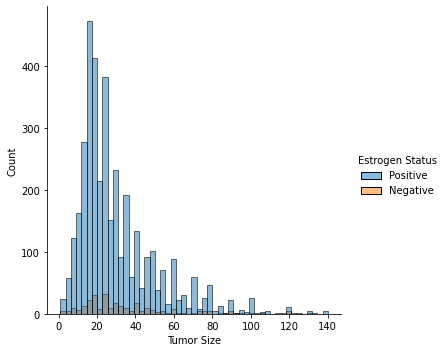

In [34]:
sns.displot(data=df, x= "Tumor Size", hue = "Estrogen Status")

<AxesSubplot:xlabel='Age', ylabel='Status'>

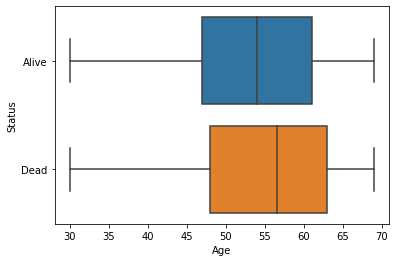

In [13]:
sns.boxplot(x='Age', y='Status', data=df )

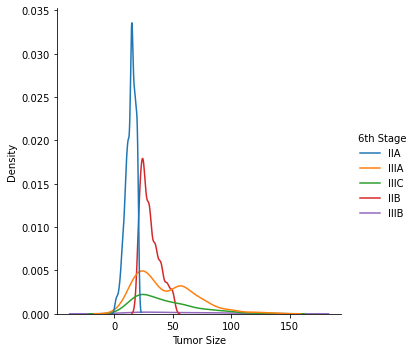

In [43]:
sns.displot(data=df, x="Tumor Size",hue="6th Stage", kind="kde")

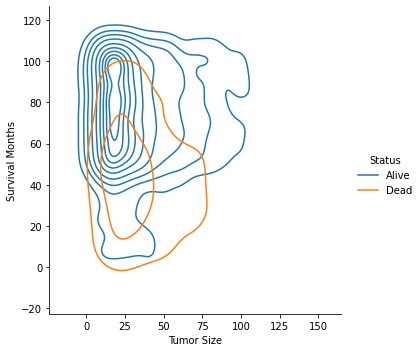

In [44]:
sns.displot(data=df, x="Tumor Size", y= "Survival Months", hue="Status", kind="kde") 

### Prepare data for model

## Modeling

Chosing the model.
Prediction whethere or not the patient has a cancer is a classification task.
We will try to apply all existing classification model starting from 
Logistic Regression and Naive Bayes and finising with Stochastic Gradient Desent and Neural Network.

As a metric we will use F1- score and log loss.